<a href="https://colab.research.google.com/github/MohamedHSallam/Galton-Box-QC-/blob/main/Wiser_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**default.qubit:** Vanilla qubit quantum device, for circuits without noise. It is not optimized for performance, but it's the first one to be upgraded and will have the most advanced features at any point in time.


**lightning.qubit:** A fast noiseless qubit device. It is optimized for performance via a C++ backend, but its development will often lag a bit behind default.qubit.


**default.mixed:** A qubit device that allows noisy gates. It works with the density operator representation of quantum states.




---



unfortunattelyy tthe code should be run in order, because ttttthere are some functttions and variables the depend on some preious code block  

#Must be run

In [8]:
!pip install pennylane
!pip3 install pennylane-qrack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.8 MB/s eta 0:00:00


In [6]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

ImportError: cannot import name 'IBMQ' from 'qiskit' (/usr/local/lib/python3.11/dist-packages/qiskit/__init__.py)

#Pennylane

##1-level Galton Box

Building the curcit

In [15]:
t1_dev_Ideal = qml.device("lightning.qubit", 4)
t1_dev_Noise = qml.device("qrack.simulator", 4, shots=1024) #adding shots to be more realistic

def _1_level_Galton_Box ():
  qml.Hadamard(0)
  qml.X(2)
  qml.CSWAP((0,1,2))
  qml.CNOT(wires=[2,0])
  qml.CSWAP((0,2,3))
  return qml.probs((1,3))

_1_level_Galton_Box_I=qml.QNode(_1_level_Galton_Box,t1_dev_Ideal) #Ideal verison
_1_level_Galton_Box_N=qml.QNode(_1_level_Galton_Box,t1_dev_Noise) #Noisy verison

Display the drawing of the circuit

(<Figure size 700x500 with 1 Axes>, <Axes: >)

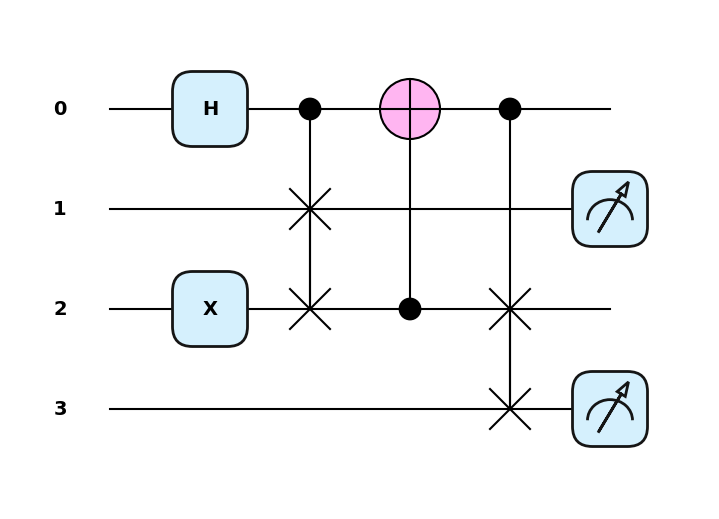

In [286]:
qml.draw_mpl(_1_level_Galton_Box_I,style="pennylane")()

Measurement result

In [16]:
print("the Ideal result is :\n",_1_level_Galton_Box_I())
print("the Noisy result is :\n",_1_level_Galton_Box_N())

the Ideal result is :
 [0.  0.5 0.5 0. ]
the Noisy result is :
 [0.         0.51367188 0.48632812 0.        ]


Ploting the data (Measurement)

/tmp/ipython-input-1195789427.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


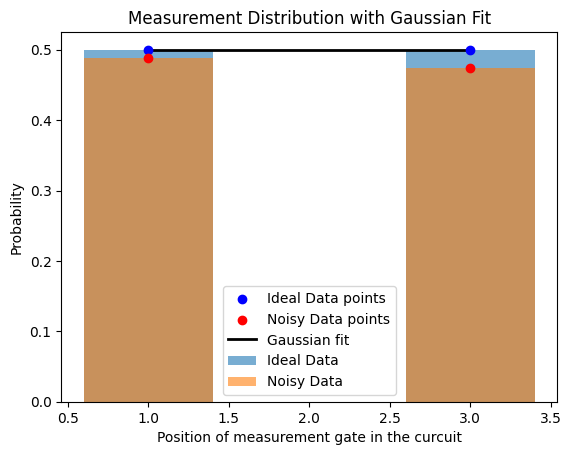



The Gassian does not seem well, because the data is very small to present it


In [21]:
x_1=[1,3]
y_1=[_1_level_Galton_Box_I()[i] for i in [2**j for j in range(int(math.log(2**1, 2)) + 1)]]
y_1_n=[_1_level_Galton_Box_N()[i] for i in [2**j for j in range(int(math.log(2**1, 2)) + 1)]]

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_1[np.argmax(y_1)]
sigma_guess = (max(x_1) - min(x_1)) / 6
amp_guess = max(y_1)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_1,
    y_1,
    p0=initial_guess,
    bounds=([min(x_1), 0, 0], [max(x_1), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_1), max(x_1), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_1, y_1, width=0.8, alpha=0.6, label="Ideal Data")
plt.scatter(x_1, y_1, color="blue", zorder=5, label="Ideal Data points")
plt.bar(x_1, y_1_n, width=0.8, alpha=0.6, label="Noisy Data")
plt.scatter(x_1, y_1_n, color="red", zorder=5, label="Noisy Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

print("\n\nThe Gassian does not seem well, because the data is very small to present it")

The Gassian won't seem right, because the data is very small to present it

this is the another way to apply Gaussian distrubtion but the data is not tottaly accurate with the curve

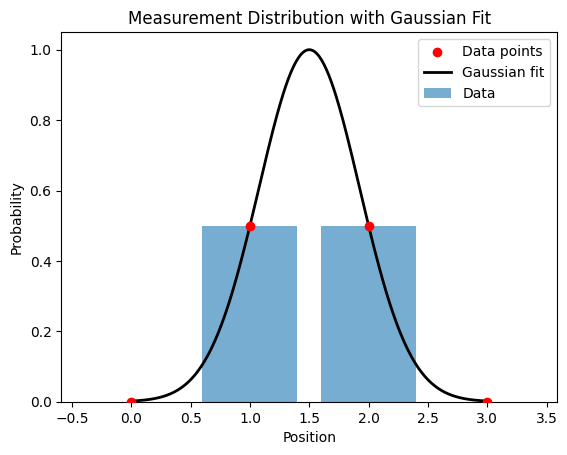

In [103]:
x_1_2=[0,1,2,3]
y_1_2=_1_level_Galton_Box()

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_1_2[np.argmax(y_1_2)]
sigma_guess = (max(x_1_2) - min(x_1_2)) / 6
amp_guess = max(y_1_2)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_1_2,
    y_1_2,
    p0=initial_guess,
    bounds=([min(x_1_2), 0, 0], [max(x_1_2), 1, 1]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_1_2), max(x_1_2), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_1_2, y_1_2, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_1_2, y_1_2, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##2-level Galton Box

there is two ways to replace the missing of Reset gate in Pennylane:


1.   Add extra Q-bit as a control one for the second layer
2.   Create a custom Reset gate



###Extra Q-bit

Building the curcit

In [55]:
t2_dev = qml.device("lightning.qubit", 7)

@qml.qnode(t2_dev)
def _2_level_Galton_Box_E ():
  qml.Hadamard(0)
  qml.X(4)
  qml.CSWAP((0,3,4))
  qml.CNOT(wires=[4,0])
  qml.CSWAP((0,4,5))
  qml.Hadamard(1)
  qml.CSWAP((1,2,3))
  qml.CNOT(wires=[3,1])
  qml.CSWAP((1,3,4))
  qml.CNOT(wires=[4,1])
  qml.CSWAP((1,4,5))
  qml.CNOT(wires=[5,1])
  qml.CSWAP((1,5,6))
  return qml.probs((2,4,6))

Display the drawing of the circuit

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

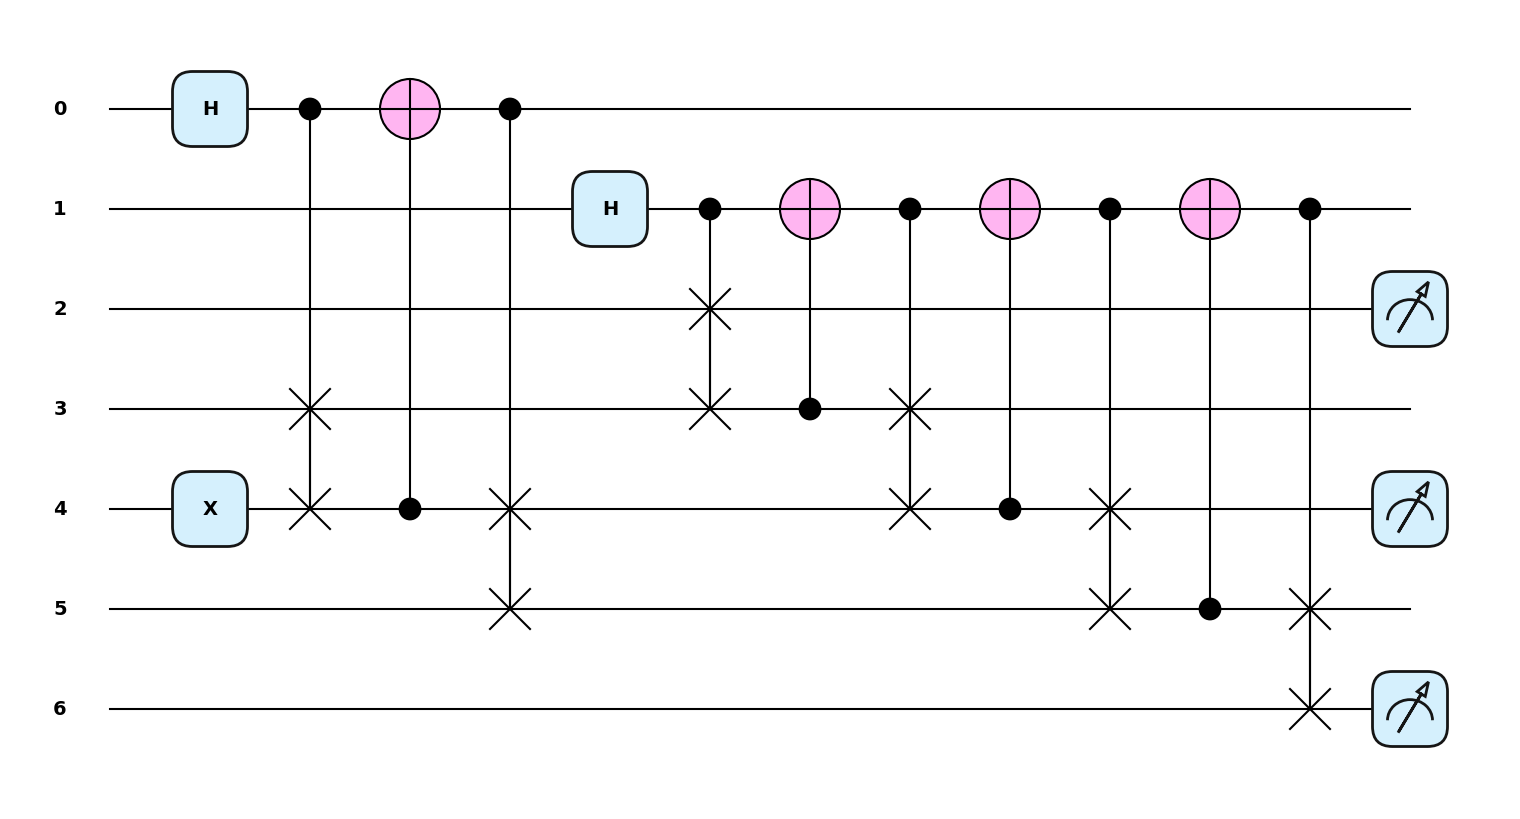

In [30]:
qml.draw_mpl(_2_level_Galton_Box_E,style="pennylane")()

Measurement result

In [56]:
_2_level_Galton_Box_E()

array([0.  , 0.25, 0.5 , 0.  , 0.25, 0.  , 0.  , 0.  ])

Ploting the data (Measurement)

/tmp/ipython-input-2024341439.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


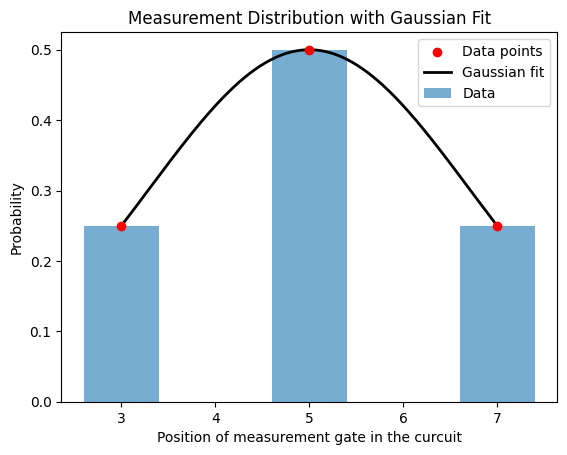

In [99]:
x_2_E=[i for i in range(2,7,2)] #index of measurement gates
y_2_E=[_2_level_Galton_Box_R()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_2_E[np.argmax(y_2_E)]
sigma_guess = (max(x_2_E) - min(x_2_E)) / 6
amp_guess = max(y_2_E)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_2_E,
    y_2_E,
    p0=initial_guess,
    bounds=([min(x_2_E), 0, 0], [max(x_2_E), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_2_E), max(x_2_E), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_2_E, y_2_E, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_2_E, y_2_E, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

###Custom Reset gate

Forunately, the suitable Reset gate is X gate

But, it not generally efficient, because: it been created only for this problem, so it only work for these circuits/conditions

Altough, it is very efficitive and appliable, because instead of using a new Q-bit for every level it use one gate, which save more time and energy  

In [79]:
t2_dev = qml.device("lightning.qubit", 6)

@qml.qnode(t2_dev)
def _2_level_Galton_Box_R ():
  qml.Hadamard(0)
  qml.X(3)
  qml.CSWAP((0,2,3))
  qml.CNOT(wires=[3,0])
  qml.CSWAP((0,3,4))
  qml.X(0) # Reset_gate
  qml.Hadamard(0)
  qml.CSWAP((0,1,2))
  qml.CNOT(wires=[2,0])
  qml.CSWAP((0,2,3))
  qml.CNOT(wires=[3,0])
  qml.CSWAP((0,3,4))
  qml.CNOT(wires=[4,0])
  qml.CSWAP((0,4,5))
  return qml.probs((1,3,5))

Display the drawing of the circuit

(<Figure size 1600x700 with 1 Axes>, <Axes: >)

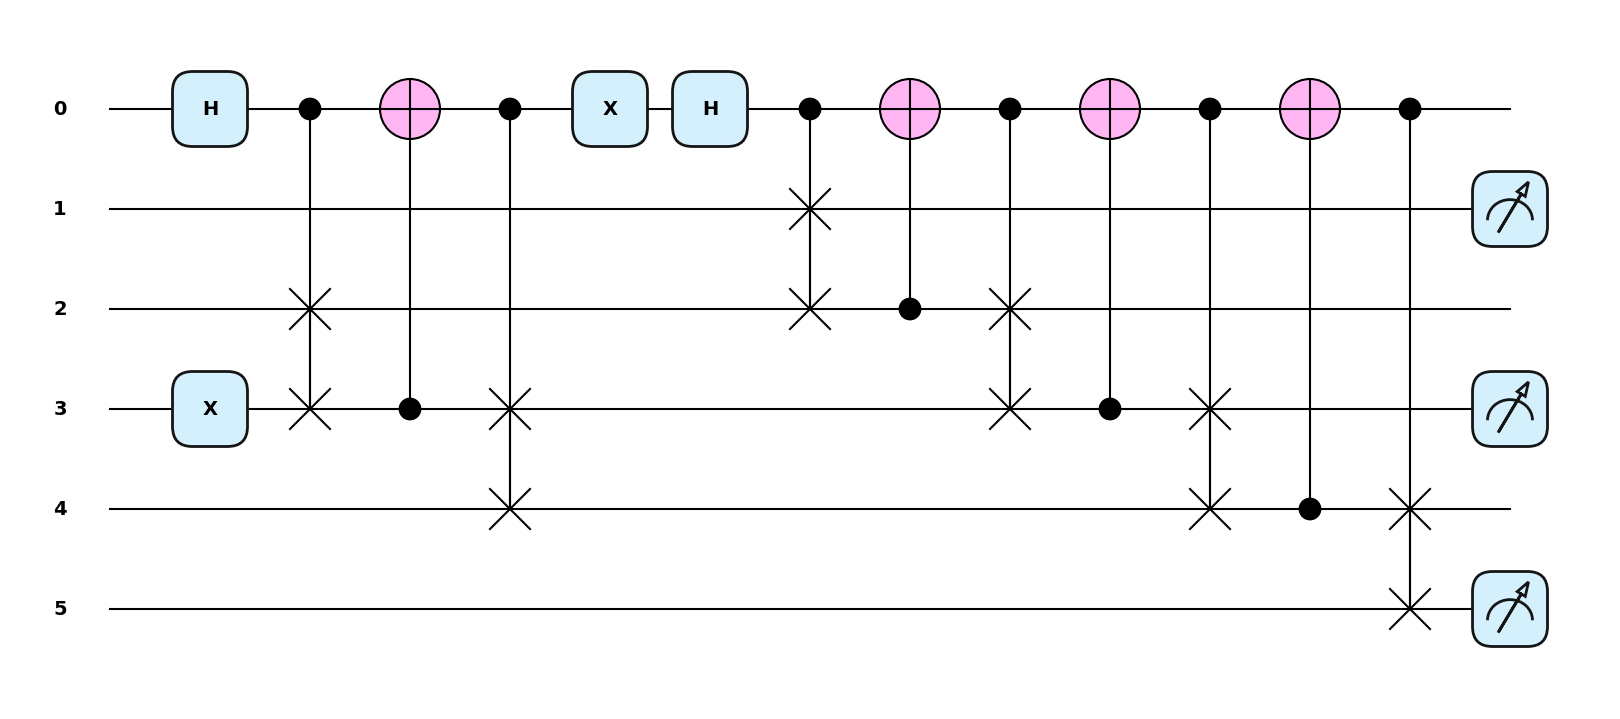

In [80]:
qml.draw_mpl(_2_level_Galton_Box_R,style="pennylane")()

Measurement result

In [81]:
_2_level_Galton_Box_R()

array([0.  , 0.25, 0.5 , 0.  , 0.25, 0.  , 0.  , 0.  ])

Ploting the data (Measurement)

/tmp/ipython-input-3517564463.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


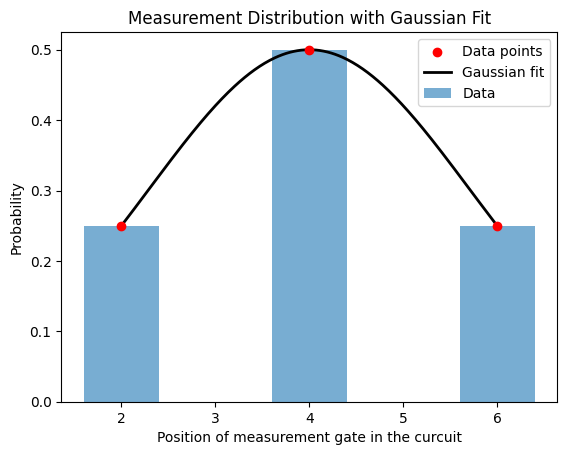

In [100]:
x_2_R=[i for i in range(2,7,2)] #index of measurement gates
y_2_R=[_2_level_Galton_Box_E()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_2_R[np.argmax(y_2_R)]
sigma_guess = (max(x_2_R) - min(x_2_R)) / 6
amp_guess = max(y_2_R)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_2_R,
    y_2_R,
    p0=initial_guess,
    bounds=([min(x_2_R), 0, 0], [max(x_2_R), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_2_R), max(x_2_R), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_2_R, y_2_R, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_2_R, y_2_R, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##General-level Galton Box

In the beginging we need to take how many level you want to run

"It is recommended that the maxiumum level on free google colab version is 7, otherwise it will crash"

**Notice**: all following codes box depend on this value

In [3]:
n=int(input("# of gates = n(2n-1)\n enter n (number of layers):"))

# of gates = n(2n-1)
 enter n (number of layers):4


###Using Extra Q-bit

which non-efficient at all

Building the curcit

In [158]:
g_dev_E = qml.device ("lightning.qubit", wires = 3*n+2)

@qml.qnode(g_dev_E)

def general_level_Galton_Box_E():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.Hadamard(wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)


Display the drawing of the circuit

(<Figure size 11500x2300 with 1 Axes>, <Axes: >)

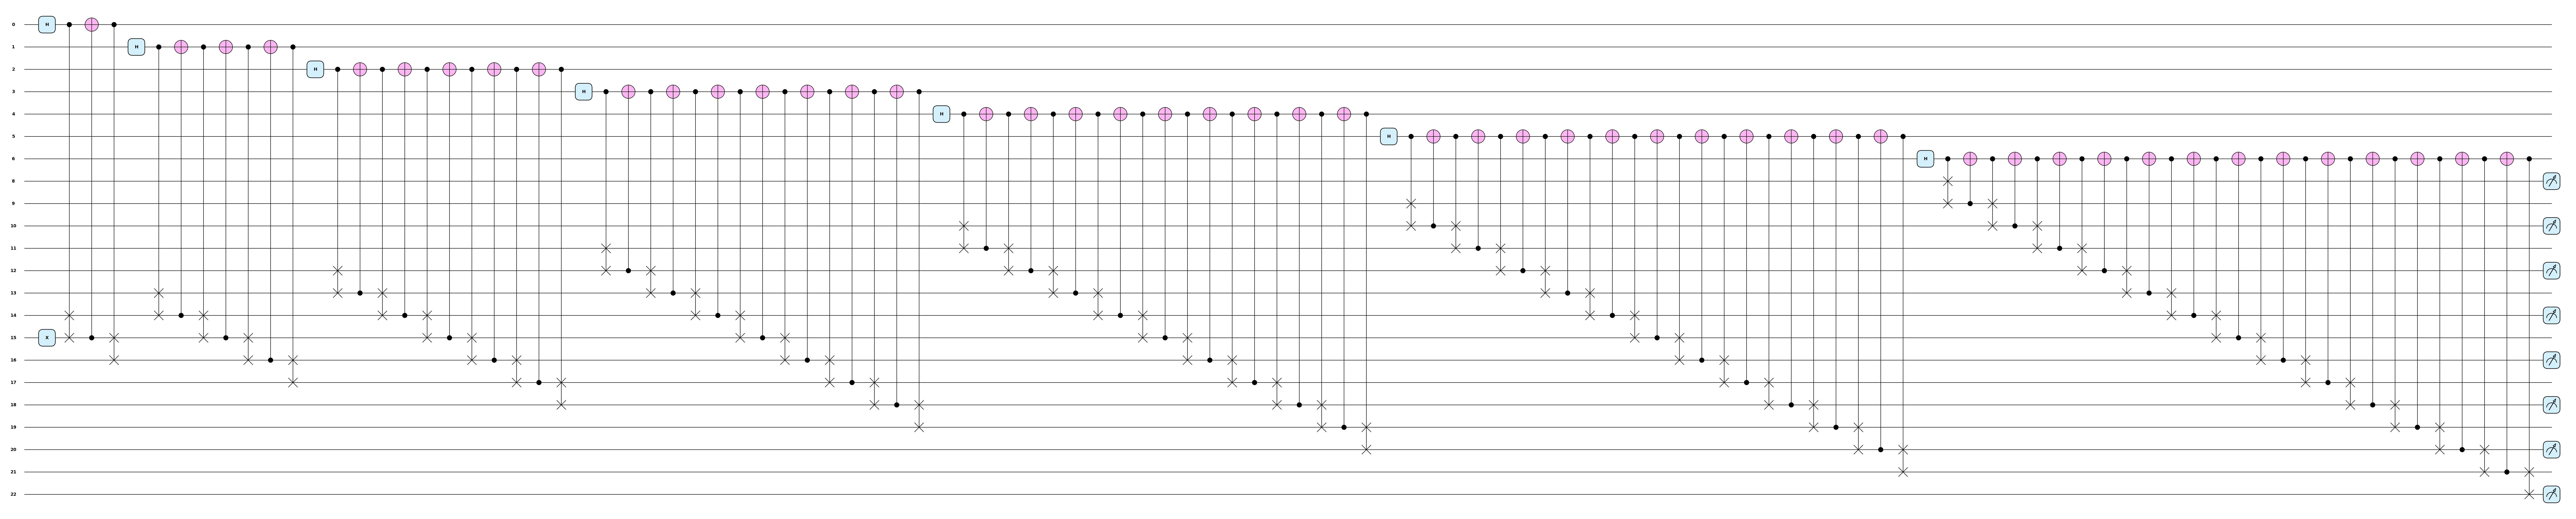

In [159]:
qml.draw_mpl(general_level_Galton_Box_E,style="pennylane")()

Measurement result

In [160]:
general_level_Galton_Box_E()

array([0.       , 0.0078125, 0.0546875, 0.       , 0.1640625, 0.       ,
       0.       , 0.       , 0.2734375, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.2734375, 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.1640625, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.0546875, 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

Ploting the data (Measurement)

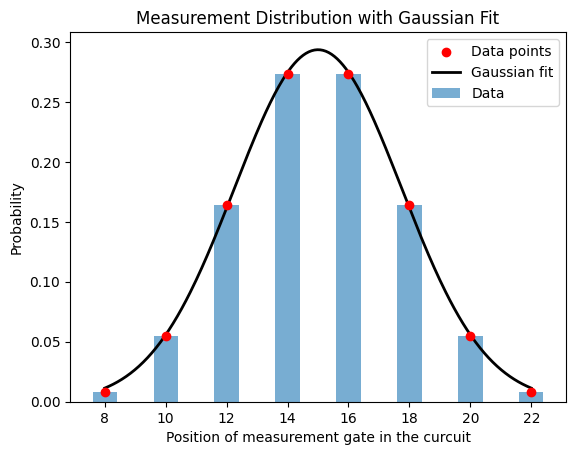

In [161]:
x_g_E=[i for i in range (n+1,3*n+2,2)] #number of measurement gates
y_g_E=[general_level_Galton_Box_E()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_g_E[np.argmax(y_g_E)]
sigma_guess = (max(x_g_E) - min(x_g_E)) / 6
amp_guess = max(y_g_E)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_g_E,
    y_g_E,
    p0=initial_guess,
    bounds=([min(x_g_E), 0, 0], [max(x_g_E), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_g_E), max(x_g_E), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_g_E, y_g_E, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_g_E, y_g_E, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

###Custom Reset gate

which more efficient than Extra Q-bit

**Fix it**

Building the curcit

In [35]:
g_dev_R = qml.device ("lightning.qubit", wires = 2*n+2)#, shots=1024)

@qml.qnode(g_dev_R)

def general_level_Galton_Box_R():
  para=2*n
  mid=n+1
  qml.X(wires=[mid])
  qml.Hadamard(wires=[0])
  for i in range(para):
    # qml.Hadamard(wires=[0])
    k=0
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      k+=1
      qml.CNOT(wires=[mid+j,0])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))
         k+=1
         if i!= n-1:
          qml.RX(2*np.atan(complex(0,(0.5+(1/(2**(i+2)))/(0.5-(1/(2**(i+2))))))),wires=[i])
          qml.Hadamard(wires=[0])
    if i==n-1:
         break

  result=()
  for i in range (1,2*n+2,2):
    result+=(i,)

  # return qml.probs(result)
  return qml.probs(0)

Display the drawing of the circuit

(<Figure size 11600x1700 with 1 Axes>, <Axes: >)

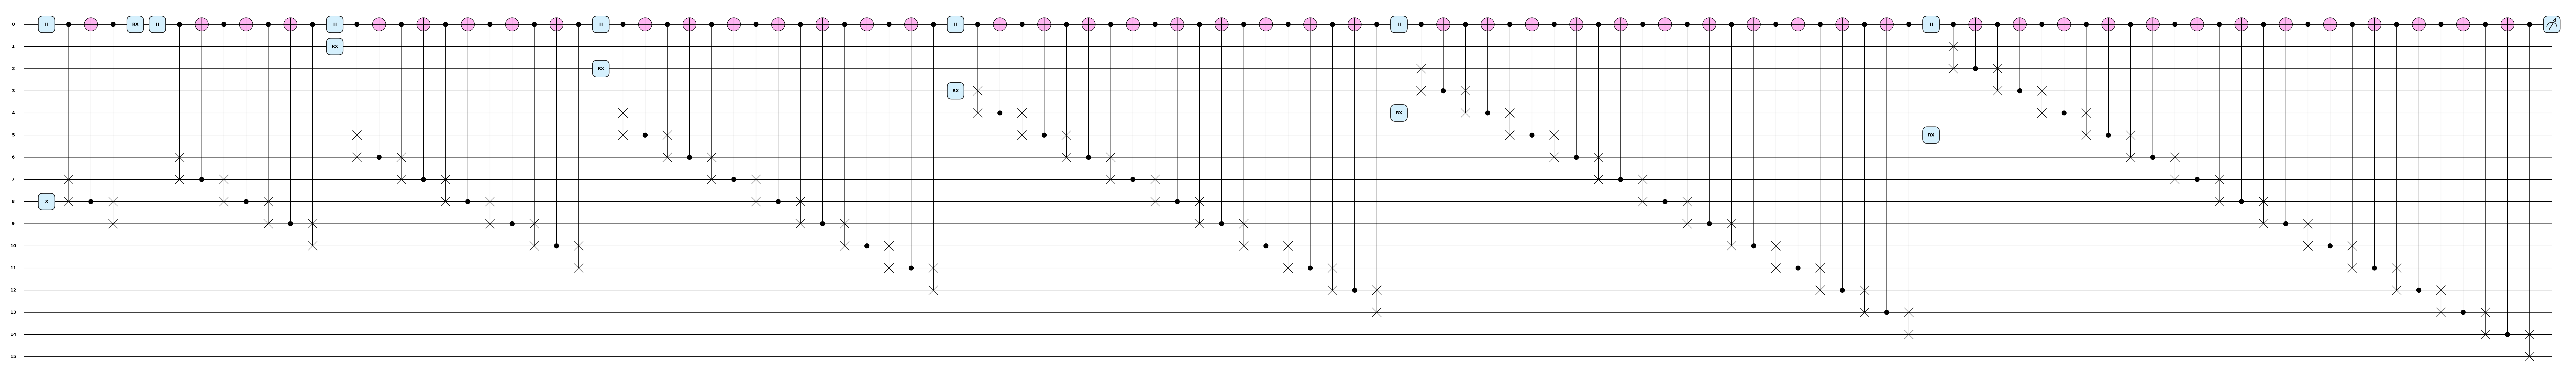

In [36]:
qml.draw_mpl(general_level_Galton_Box_R,style="pennylane")()

Measurement result

In [37]:
general_level_Galton_Box_R()

/usr/local/lib/python3.11/dist-packages/pennylane_lightning/lightning_qubit/_state_vector.py:275: ComplexWarning: Casting complex values to real discards the imaginary part
  method(wires, invert_param, param)


array([0.4609375, 0.5390625])

Ploting the data (Measurement)

In [76]:
x_g_R=[i for i in range (1,2*n+2,2)] #number of measurement gates
y_g_R=[general_level_Galton_Box_R()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_g_R[np.argmax(y_g_R)]
sigma_guess = (max(x_g_R) - min(x_g_R)) / 6
amp_guess = max(y_g_R)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_g_R,
    y_g_R,
    p0=initial_guess,
    bounds=([min(x_g_R), 0, 0], [max(x_g_R), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_g_R), max(x_g_R), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_g_R, y_g_R, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_g_R, y_g_R, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

##Modification

###Exponential distribution





It just shift the distribution to right (or left if the target is exponential decay). In other words, I used baised probabelity distribution

Building the curcit

In [237]:
_E_theta = 0.2
E_theta = float(np.pi-_E_theta)  # if used a very small number instead of 0.4 the data obviously "by bare eyes" will blow and the exponential will not be noticed
                                 # is it almost pi, if it = pi it will give an single bar and the for e^(-x) E_theta = _E_theta
                                 # if you want a obvious exponential data points, increase the value of _E_theta "recommended value is 0.4"

@qml.qnode(g_dev_E)

def Exp_circuit():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
   qml.RX(E_theta,wires=[i])
   for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
   if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

Display the drawing of the circuit

(<Figure size 11500x2300 with 1 Axes>, <Axes: >)

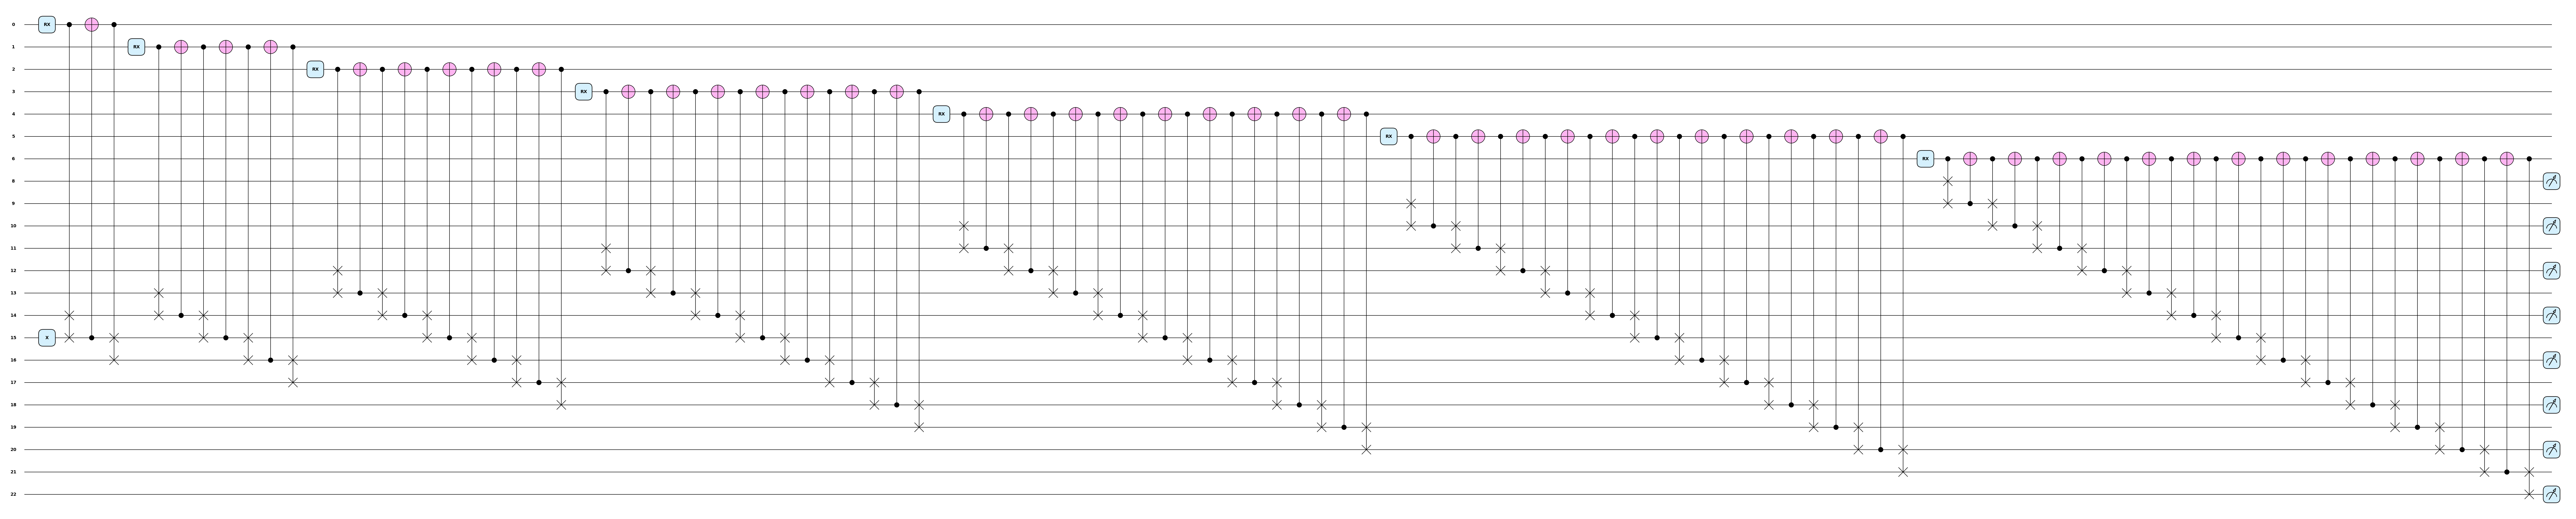

In [193]:
qml.draw_mpl(Exp_circuit,style="pennylane")()

Measurement result

In [194]:
Exp_circuit()

array([0.00000000e+00, 6.06801248e-19, 1.69621246e-15, 0.00000000e+00,
       2.03206338e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.35245164e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.40079245e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.29403041e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Ploting the data (Measurement)

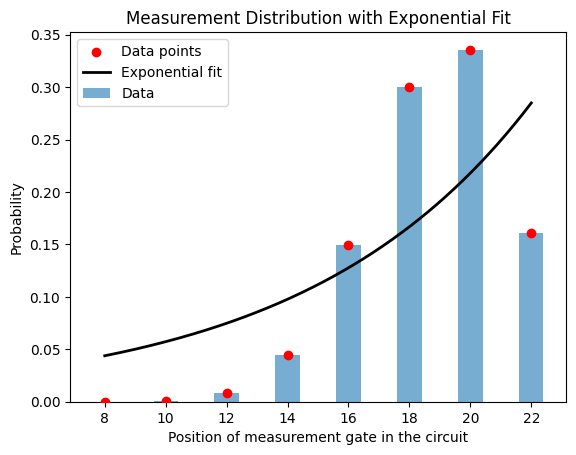

In [238]:
x_Exp_=[i for i in range (n+1,3*n+2,2)] #number of measurement gates
y_Exp_=[Exp_circuit()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)

x_Exp,y_Exp=[],[]
for i in range(len(y_Exp_)):
  if y_Exp_ !=0:
    y_Exp.append(y_Exp_[i])
    x_Exp.append(x_Exp_[i])

# --- Example Exponential function ---
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# --- Initial guess for fit ---
a_guess = max(y_Exp) - min(y_Exp)
b_guess = 0.1
if E_theta<np.pi/2:
  b_guess=-0.1
c_guess = min(y_Exp)
initial_guess = [a_guess, b_guess, c_guess]

# --- Fit Exponential ---
popt, _ = curve_fit(
    exponential,
    x_Exp,
    y_Exp,
    p0=initial_guess,
    bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]),
    maxfev=5000
)
a_fit, b_fit, c_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_Exp), max(x_Exp), 300)
y_fit = exponential(x_fit, a_fit, b_fit, c_fit)

# --- Plot ---
plt.bar(x_Exp, y_Exp, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_Exp, y_Exp, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Exponential fit")

# Labels
plt.xlabel("Position of measurement gate in the circuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Exponential Fit")
plt.legend()
plt.show()

If theta = 0.4 the bar exponetial increament will be obvious, but the curve will not be completely fitted.

I have created a more controled shifting distribution in addition moddifications

###Hadamard quantum walk

####symmertic

To give a equal distributed function the frist Q-bit (the middle one in the curcuit) should be also symmertic distrubuted. in other words, the final distribution depend on the state of the frist  Q-bit

Building the curcit

In [171]:
dev = qml.device("lightning.qubit", wires=2*n+1)

@qml.qnode(dev)
def Qwalk_s():
  coin=0
  #shifting for index
  pos_qubits = list(range(1, 2*n))
  qml.Hadamard(wires=0)

  # Initial position: middle (binary 1000...0 style)
  # qml.X(pos_qubits[len(pos_qubits)//2])  # start near middle

  # Walk steps
  for _ in range(n):
      # Hadamard on coin


      # Controlled increment if coin=1
        # coin=1 -> open increment
      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)
      qml.X(0)

      # Controlled decrement if coin=0
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)

      qml.X(0)

  return qml.probs(wires=pos_qubits)

Display the drawing of the circuit

(<Figure size 11600x900 with 1 Axes>, <Axes: >)

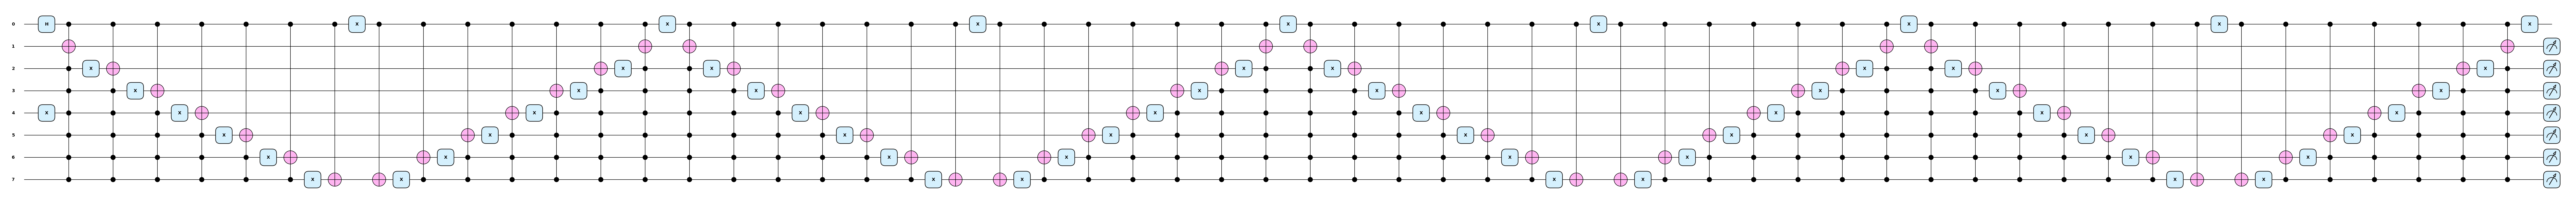

In [154]:
qml.draw_mpl(Qwalk_s,style="pennylane")()

Measurement result

In [150]:
Qwalk_s()

array([0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ])

Ploting the data (Measurement)

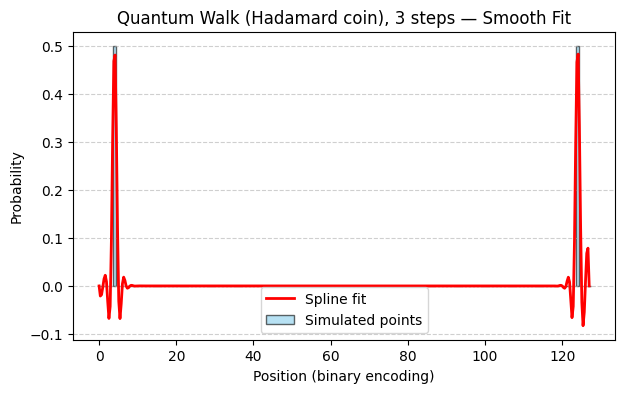

In [175]:
# Run the walk
probs = Qwalk_s()
positions = np.arange(len(probs))

# --- Spline interpolation for a smooth curve ---
x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

# --- Plot ---
plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", edgecolor="black", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="red", linewidth=2, label="Spline fit")
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {steps} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

####Basied Hadamard walk

it just depend on the begininng state of coin (wires=[0]) : :

*   Hadamard gate: symmatric (like an even function) distribution
*   I gate (Nothing applied) : to right (1 values which is the active state "|1>")
*   X gate : to left (0 values which is the pative state "|0>")



#####To Left

Building the curcit

In [181]:
dev = qml.device("lightning.qubit", wires=2*n+1)

@qml.qnode(dev)
def Qwalk_l():
  coin=0
  #shifting for index
  pos_qubits = list(range(1, 2*n))
  qml.X(wires=0)

  # Initial position: middle (binary 1000...0 style)
  # qml.X(pos_qubits[len(pos_qubits)//2])  # start near middle

  # Walk steps
  for _ in range(n):
      # Hadamard on coin


      # Controlled increment if coin=1
        # coin=1 -> open increment
      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)
      qml.X(0)

      # Controlled decrement if coin=0
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)

      qml.X(0)

  return qml.probs(wires=pos_qubits)

Display the drawing of the circuit

(<Figure size 11600x900 with 1 Axes>, <Axes: >)

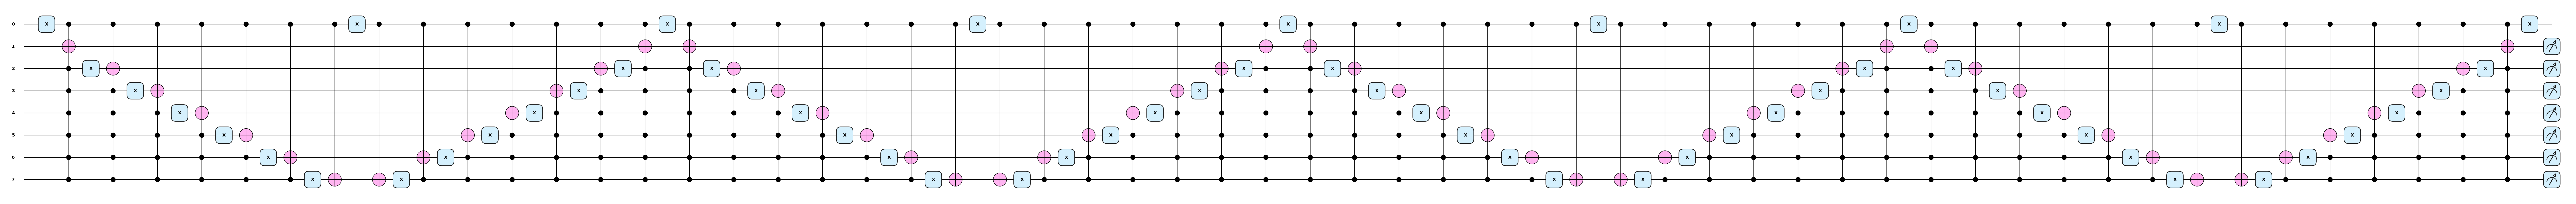

In [182]:
qml.draw_mpl(Qwalk_l,style="pennylane")()

Measurement result

In [183]:
Qwalk_l()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

Ploting the data (Measurement)

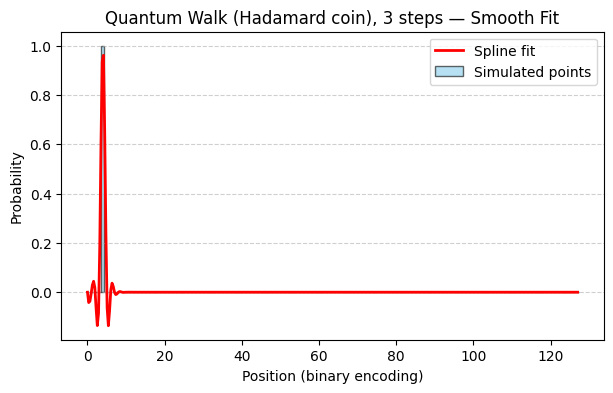

In [184]:

# Run the walk
probs = Qwalk_l()
positions = np.arange(len(probs))

# --- Spline interpolation for a smooth curve ---
x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

# --- Plot ---
plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", edgecolor="black", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="red", linewidth=2, label="Spline fit")
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {steps} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

#####To Right

Building the curcit

In [185]:
dev = qml.device("lightning.qubit", wires=2*n+1)

@qml.qnode(dev)
def Qwalk_r():
  coin=0
  #shifting for index
  pos_qubits = list(range(1, 2*n))
  # qml.X(wires=0)

  # Initial position: middle (binary 1000...0 style)
  # qml.X(pos_qubits[len(pos_qubits)//2])  # start near middle

  # Walk steps
  for _ in range(n):
      # Hadamard on coin


      # Controlled increment if coin=1
        # coin=1 -> open increment
      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)
      qml.X(0)

      # Controlled decrement if coin=0
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)

      qml.X(0)

  return qml.probs(wires=pos_qubits)

Display the drawing of the circuit

(<Figure size 11500x900 with 1 Axes>, <Axes: >)

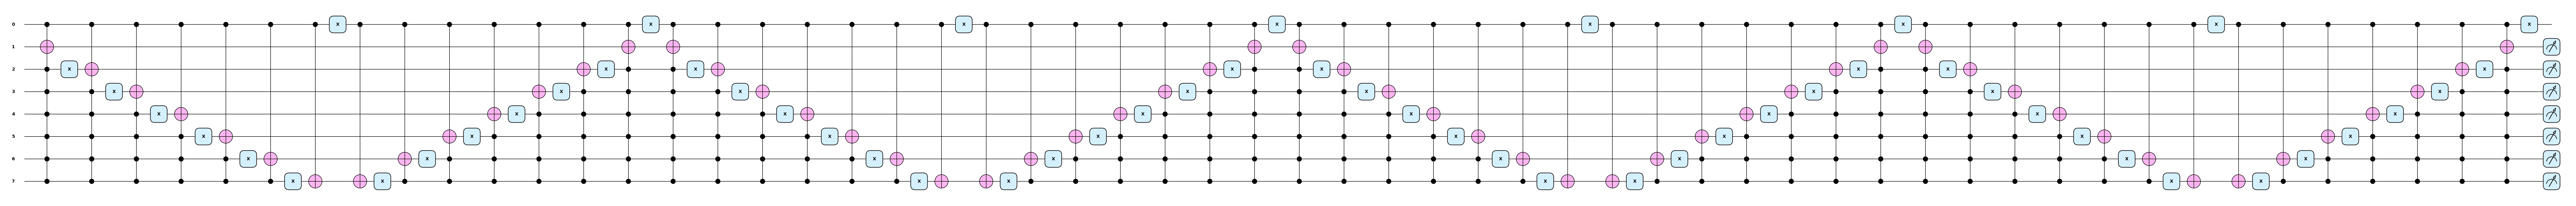

In [186]:
qml.draw_mpl(Qwalk_r,style="pennylane")()

Measurement result

In [187]:
Qwalk_r()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

Ploting the data (Measurement)

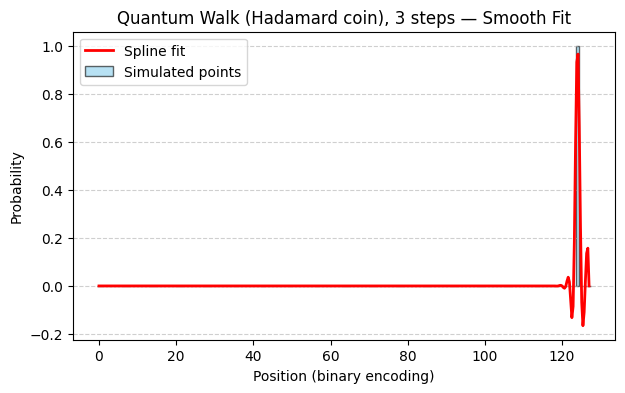

In [188]:

# Run the walk
probs = Qwalk_r()
positions = np.arange(len(probs))

# --- Spline interpolation for a smooth curve ---
x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

# --- Plot ---
plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", edgecolor="black", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="red", linewidth=2, label="Spline fit")
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {steps} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

###Addition Moddifications

###Horizontally shift for the results
(right shift for positive value and left shift for negative value)  



Taking the value of value shifting


In [310]:
try:
  while(True):
      per_the= -float(input('Enter how much do you want the distribution to go right (positive value) or left (negtive value) \nyour range is [-100,100]\n "default value is zero (0)"\n'))
      if (per_the<=100 and per_the>=-100):
        break
except ValueError:
  per_the=0

Enter how much do you want the distribution to go right (positive value) or left (negtive value) 
your range is [-100,100]
 "default value is zero (0)"
800
Enter how much do you want the distribution to go right (positive value) or left (negtive value) 
your range is [-100,100]
 "default value is zero (0)"
80


####by Custom Untiary Gates

Creating Shifting Unitary Gates

In [254]:
a,b=100,100
if per_the >0:
  a+=per_the
  b-=per_the
elif per_the <0:
  b-=per_the
  a+=per_the

#normalization
temp_a,temp_b=a,b
a = 1/((abs(temp_a)**2+abs(temp_b)**2)**(1/2)) * a
b = 1/((abs(temp_a)**2+abs(temp_b)**2)**(1/2)) * b

H_Hadamard=np.array([[a,a],[b,-b]])


print("the shape of the Unitary Matrix (Operator):\n",H_Hadamard)

Enter how much precent do you want the distribution to go right (positive value) or left (negtive value) 
your range is [-100,100]
 "default value is zero (0)"
-60
the shape of the Unitary Matrix (Operator):
 [[ 0.9701425   0.9701425 ]
 [ 0.24253563 -0.24253563]]


Building the curcit

In [255]:
@qml.qnode(g_dev_E)

def h_circuit_U():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.QubitUnitary(H_Hadamard,wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

Display the drawing of the circuit

(<Figure size 11500x2300 with 1 Axes>, <Axes: >)

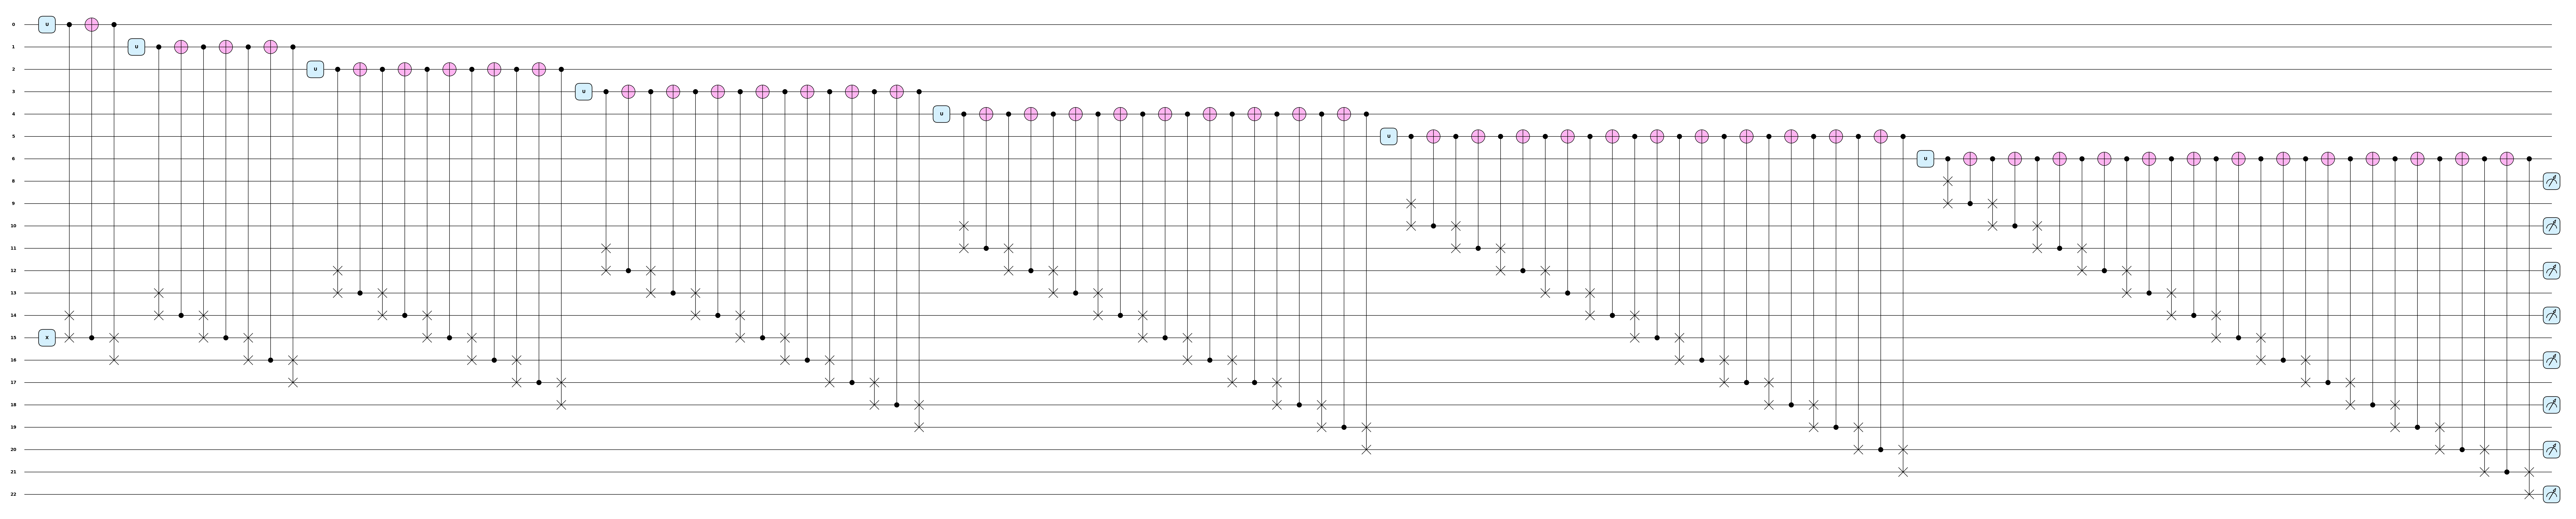

In [242]:
qml.draw_mpl(h_circuit_U,style="pennylane")()

Measurement result

In [243]:
h_circuit_U()

array([0.00000000e+00, 8.06809588e-01, 1.75878907e-01, 0.00000000e+00,
       1.64315934e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.52850867e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65593696e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.96265037e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Ploting the data (Measurement)

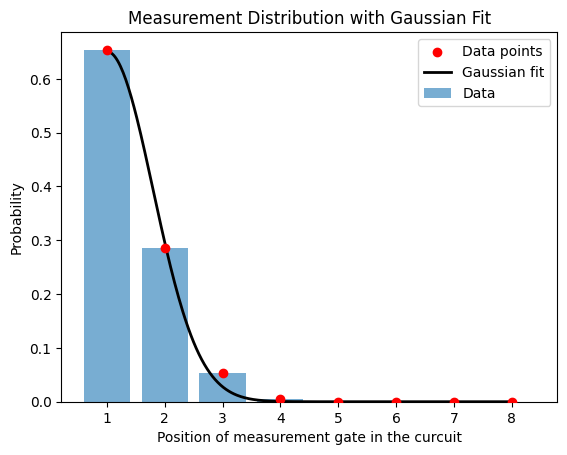

In [256]:
hx=[]
hy=[]
temp=0
for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]:
   if h_circuit_U()[i]!=0:
     temp+=1
     hx.append(temp)
     hy.append(h_circuit_U()[i])

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = hx[np.argmax(hy)]
sigma_guess = (max(hx) - min(hx)) / 6
amp_guess = max(hy)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    hx,
    hy,
    p0=initial_guess,
    bounds=([min(hx), 0, 0], [max(hx), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(hx), max(hx), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(hx, hy, width=0.8, alpha=0.6, label="Data")
plt.scatter(hx, hy, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

####by Angle Shift


In [311]:
if per_the ==100:
  per_the-=1e-999
elif per_the == -100  :
  per_the+=1e-999

g_dev_E = qml.device ("lightning.qubit", wires = 3*n+2)

@qml.qnode(g_dev_E)

def h_circuit_A():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.RX(np.pi/2*(1-(per_the/100)),wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

Display the drawing of the circuit

(<Figure size 11500x2300 with 1 Axes>, <Axes: >)

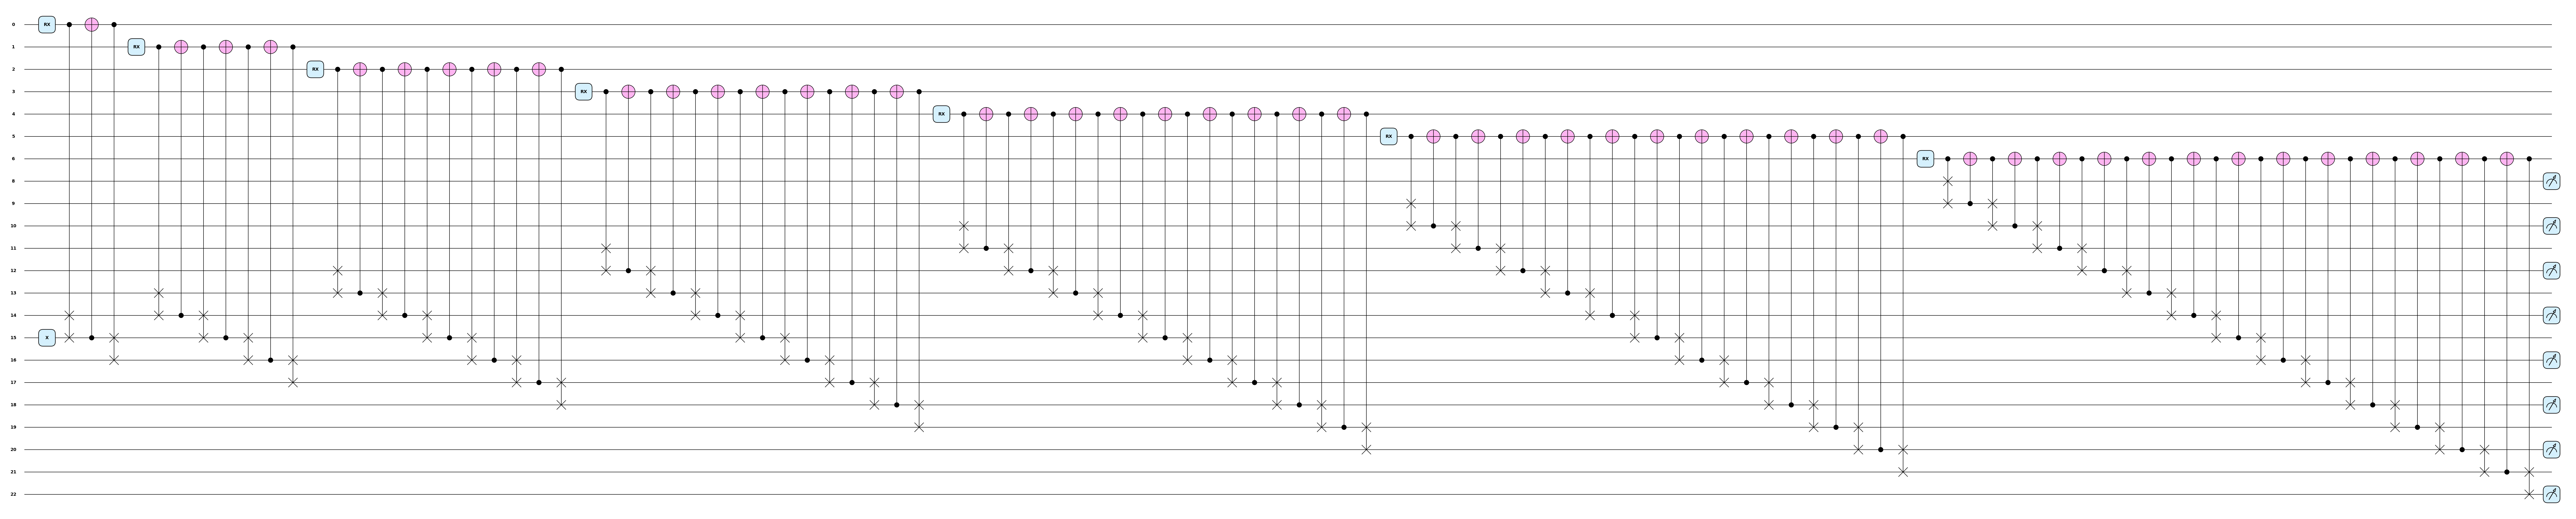

In [287]:
qml.draw_mpl(h_circuit_A,style="pennylane")()

Measurement result

In [288]:
h_circuit_A()

array([0.00000000e+00, 1.57999134e-05, 4.26011170e-04, 0.00000000e+00,
       4.92278059e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.16029386e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.21729463e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.81329448e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Ploting the data (Measurement)

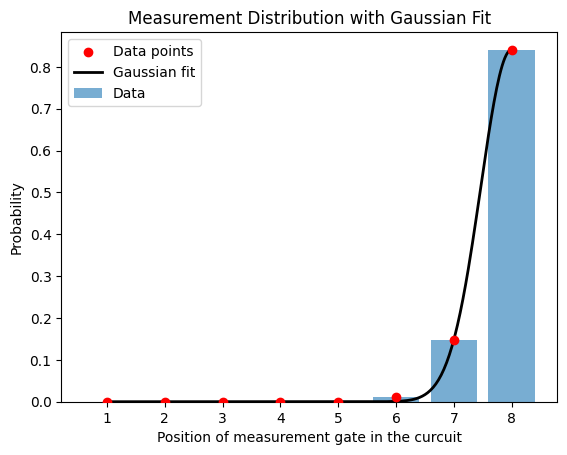

In [312]:
hx_a=[]
hy_a=[]
temp=0
for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]:
   if h_circuit_A()[i]!=0:
     temp+=1
     hx_a.append(temp)
     hy_a.append(h_circuit_A()[i])

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = hx_a[np.argmax(hy_a)]
sigma_guess = (max(hx_a) - min(hx_a)) / 6
amp_guess = max(hy_a)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    hx_a,
    hy_a,
    p0=initial_guess,
    bounds=([min(hx_a), 0, 0], [max(hx_a), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(hx_a), max(hx_a), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(hx_a, hy_a, width=0.8, alpha=0.6, label="Data")
plt.scatter(hx_a, hy_a, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

###Spilting the function to half

###Basied Hadamard walk

##Incorrect Way To Make Curcit, But edited it to give the same result


I misordered the CNOT gate between the controlled and taget qubits, so I notice instead of counting on chosing only one actived Qubit ( |1> ) in the entaglment state chossing how many active Qubit, the more number of active state

What is the benfit from it? That replacing missing of reset gate in Pennylane and use one control Qubit instead of n number (number of layers) of Controled Qubit



**Notice:** this step isn't simulation for Galton Box anymore, but sill a randomness generator

In [266]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)
@qml.qnode(dev)

def circuit2():
  mid=n+2
  qml.X(wires=[mid])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1100 with 1 Axes>, <Axes: >)

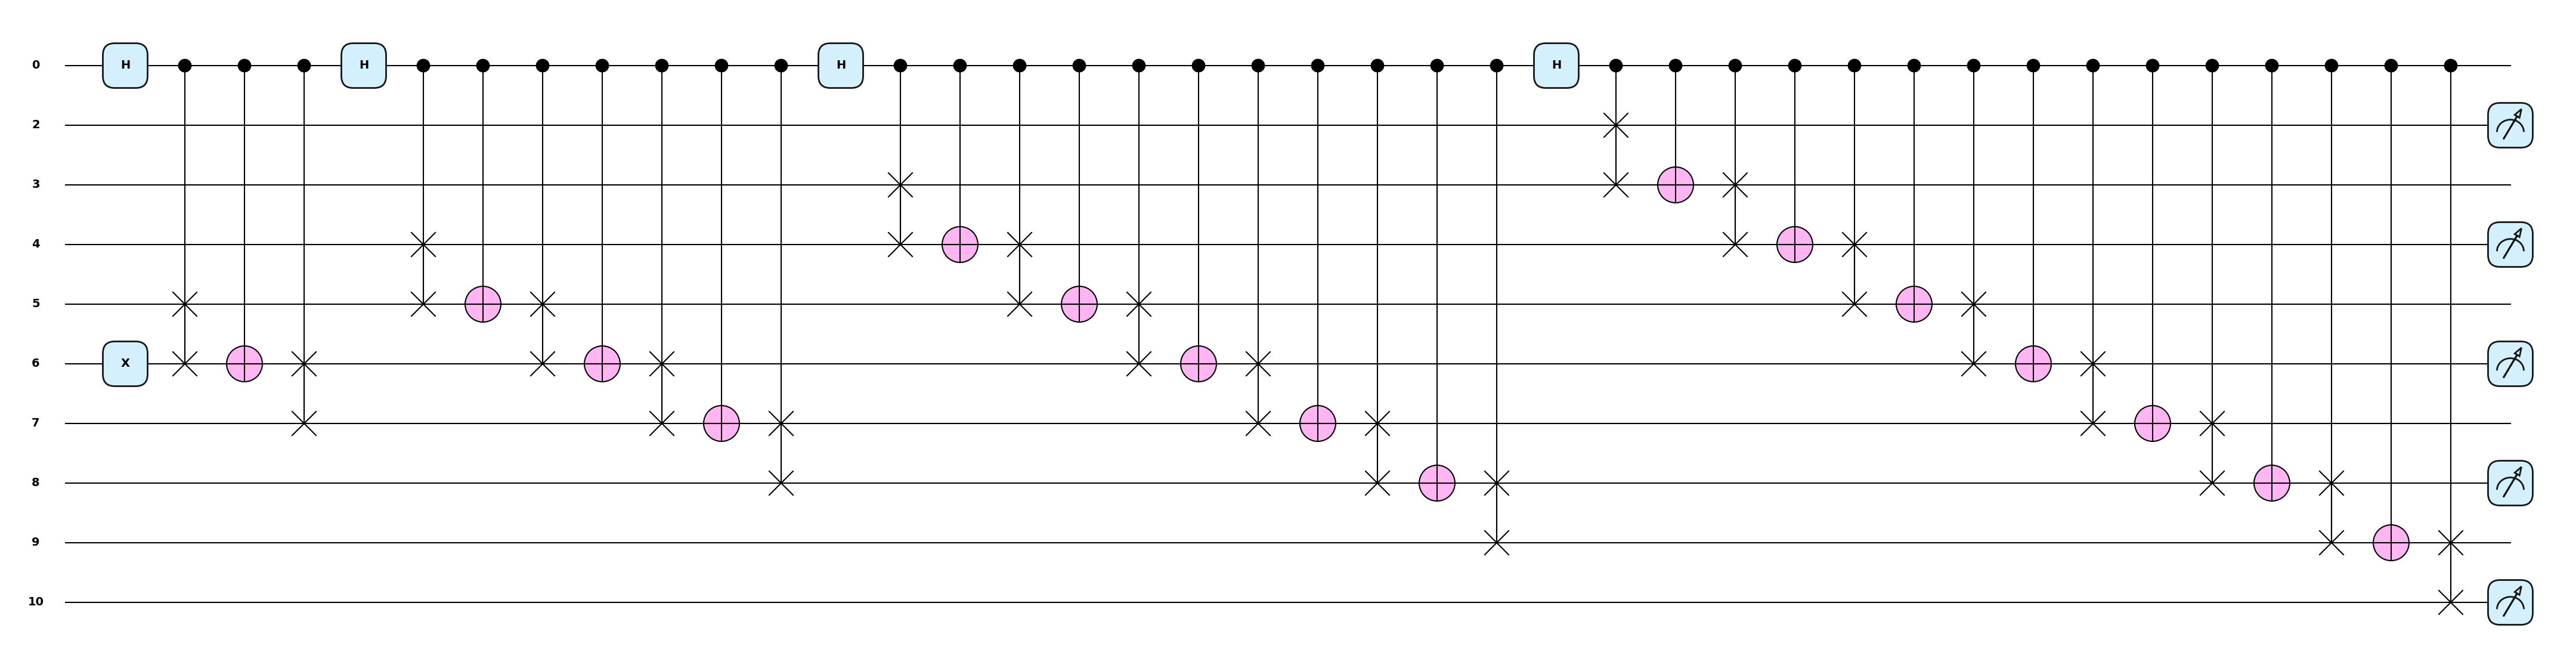

In [267]:
qml.draw_mpl(circuit2,style="pennylane")()

In [268]:
circuit2()

array([0.1875, 0.125 , 0.0625, 0.0625, 0.0625, 0.    , 0.    , 0.0625,
       0.0625, 0.0625, 0.    , 0.0625, 0.0625, 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625])

In [269]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



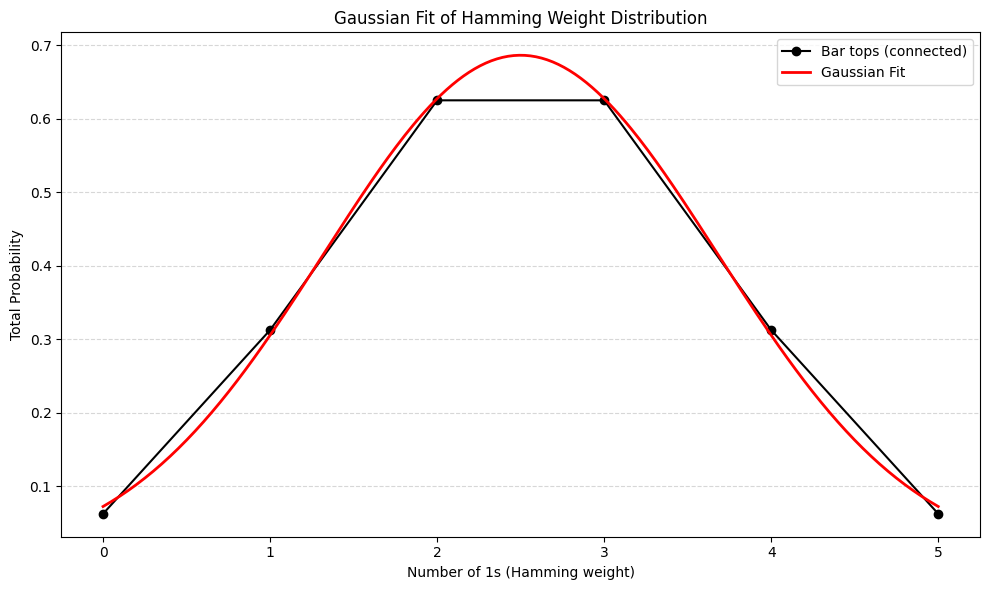

In [271]:
x=[]
y=[]
for i in range(nums_of_measurements):
  x.append(i)
  y.append(repeataion[i]/(2**n))



# plt.bar(x, y)
# # plt.bar(x, y, color="skyblue")
# plt.xlabel("Number of 1s (Hamming weight)")
# plt.ylabel("Total Probability")
# plt.title("Probability Distribution by Hamming Weight")
# # plt.xticks(range(num_qubits + 1))
# plt.grid(True, axis='y', linestyle='--', alpha=0.5)

from scipy.optimize import curve_fit
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# Initial guess: center ≈ mean of x, width ≈ std dev, amplitude ≈ max(y)
initial_guess = [np.mean(x), np.std(x), max(y)]
popt, _ = curve_fit(gaussian, x, y, p0=initial_guess)
mu_fit, sigma_fit, amp_fit = popt

# Smooth fitted curve
x_dense = np.linspace(min(x), max(x), 300)
gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Hadamard walk

###right peak


In [ ]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)

@qml.qnode(dev)

def circuit2():
  mid=n+2
  # qml.X(wires=[mid])
  for i in range(1,2*n+3):
    qml.X(wires=[i])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1300 with 1 Axes>, <Axes: >)

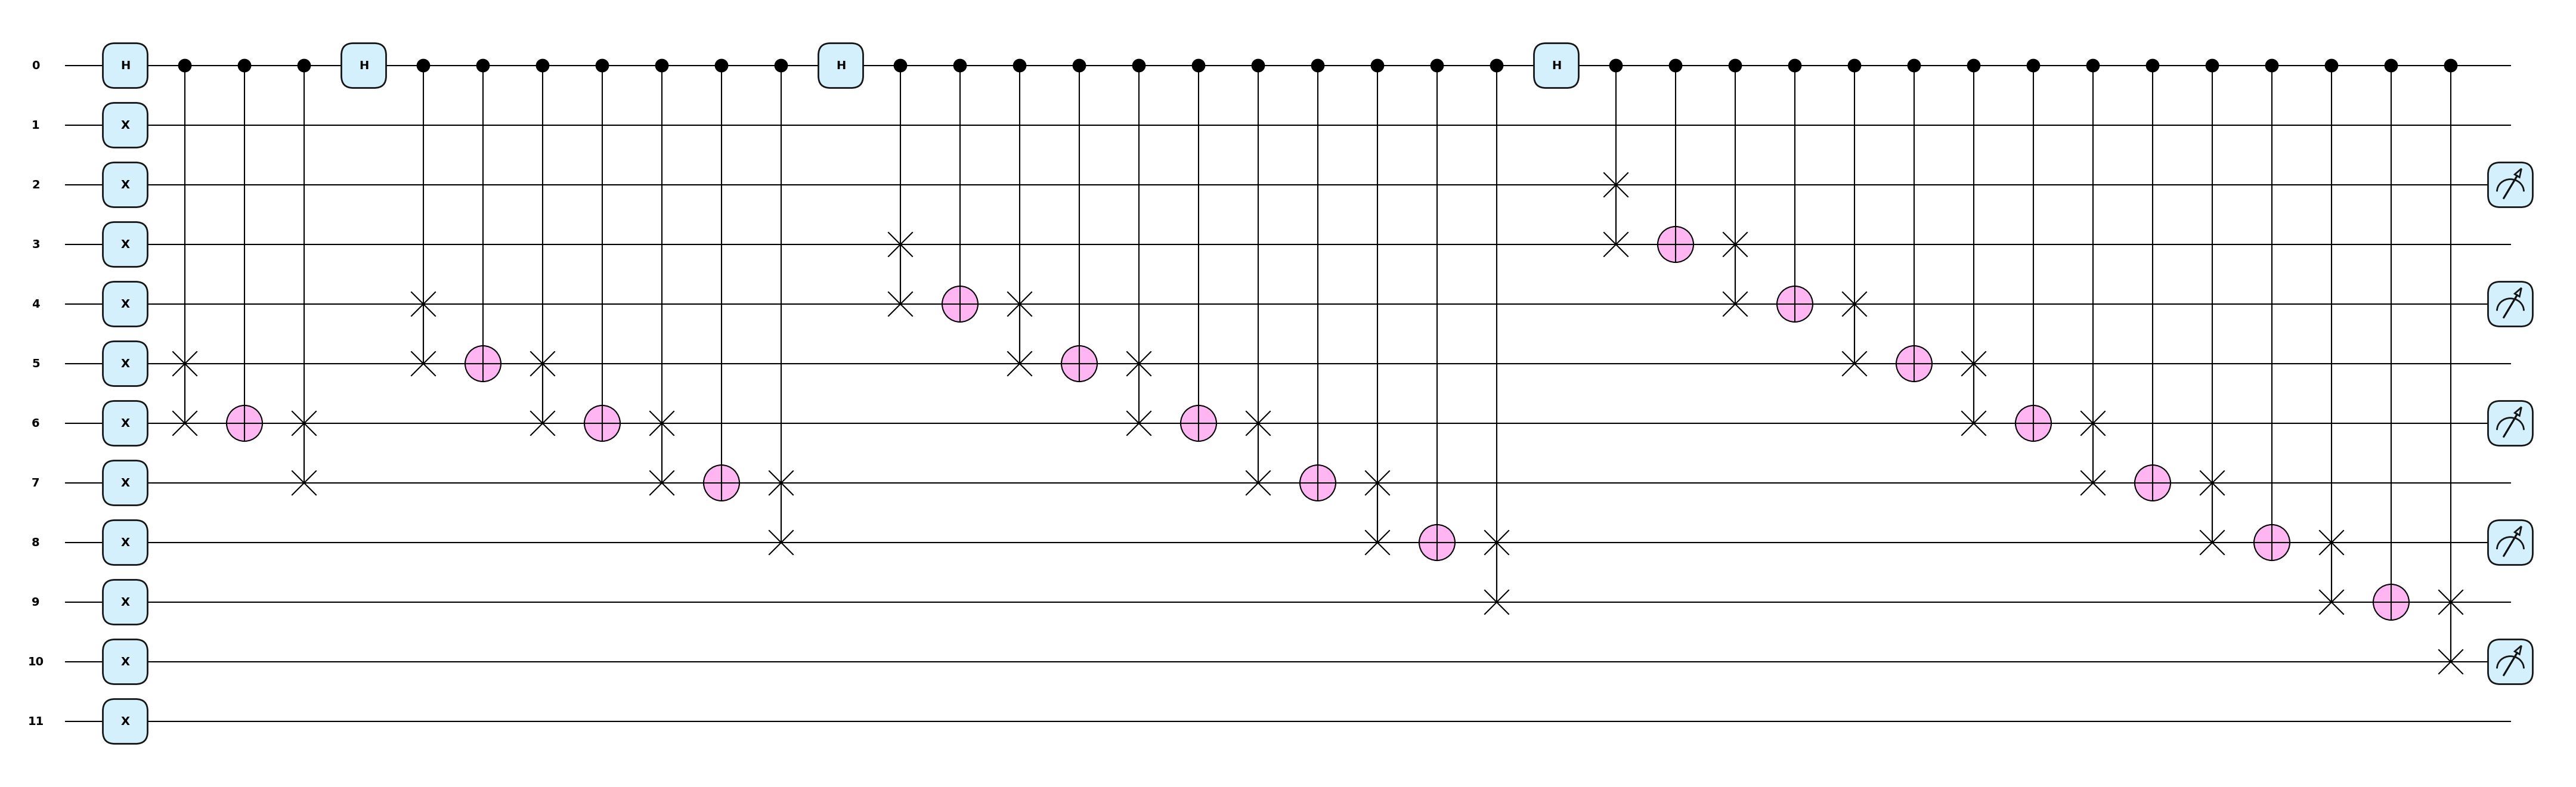

In [ ]:
qml.draw_mpl(circuit2,style="pennylane")()

In [ ]:
circuit2()

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.0625, 0.0625, 0.0625, 0.125 , 0.0625, 0.1875, 0.3125])

In [ ]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



IndexError: list index out of range

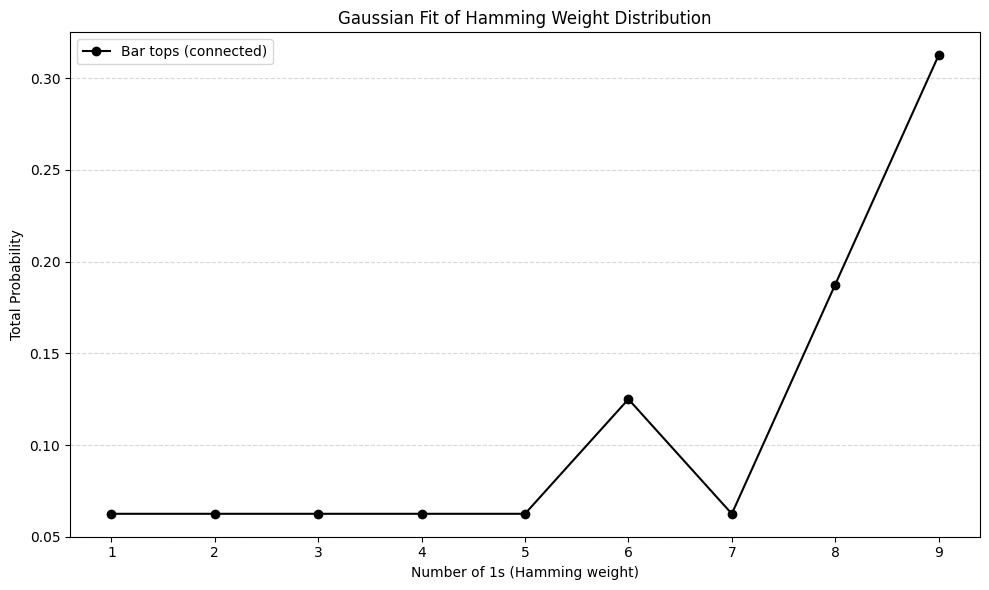

In [ ]:
x = []
y = []
sum_count = 0

# Collect data from circuit2()
for i in circuit2():
    if i != 0:
        y.append(i)
        sum_count += 1
        x.append(sum_count)

# # Gaussian function
# def gaussian(x, mu, sigma, amplitude):
#     return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# # Initial guess for parameters
# initial_guess = [np.mean(x), np.std(x), max(y)]

# # Fit Gaussian with bounds and higher maxfev
# popt, _ = curve_fit(
#     gaussian,
#     x,
#     y,
#     p0=initial_guess,
#     bounds=([min(x), 0, 0], [max(x), np.inf, np.inf]),
#     maxfev=10000
# )
# mu_fit, sigma_fit, amp_fit = popt

# # Smooth fitted curve
# x_dense = np.linspace(min(x), max(x), 300)
# gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
# plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###left peak

In [261]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)

@qml.qnode(dev)

def circuit2():
  mid=n+2
  # qml.X(wires=[mid])
  # for i in range(1,2*n+3):
  #   qml.X(wires=[i])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1100 with 1 Axes>, <Axes: >)

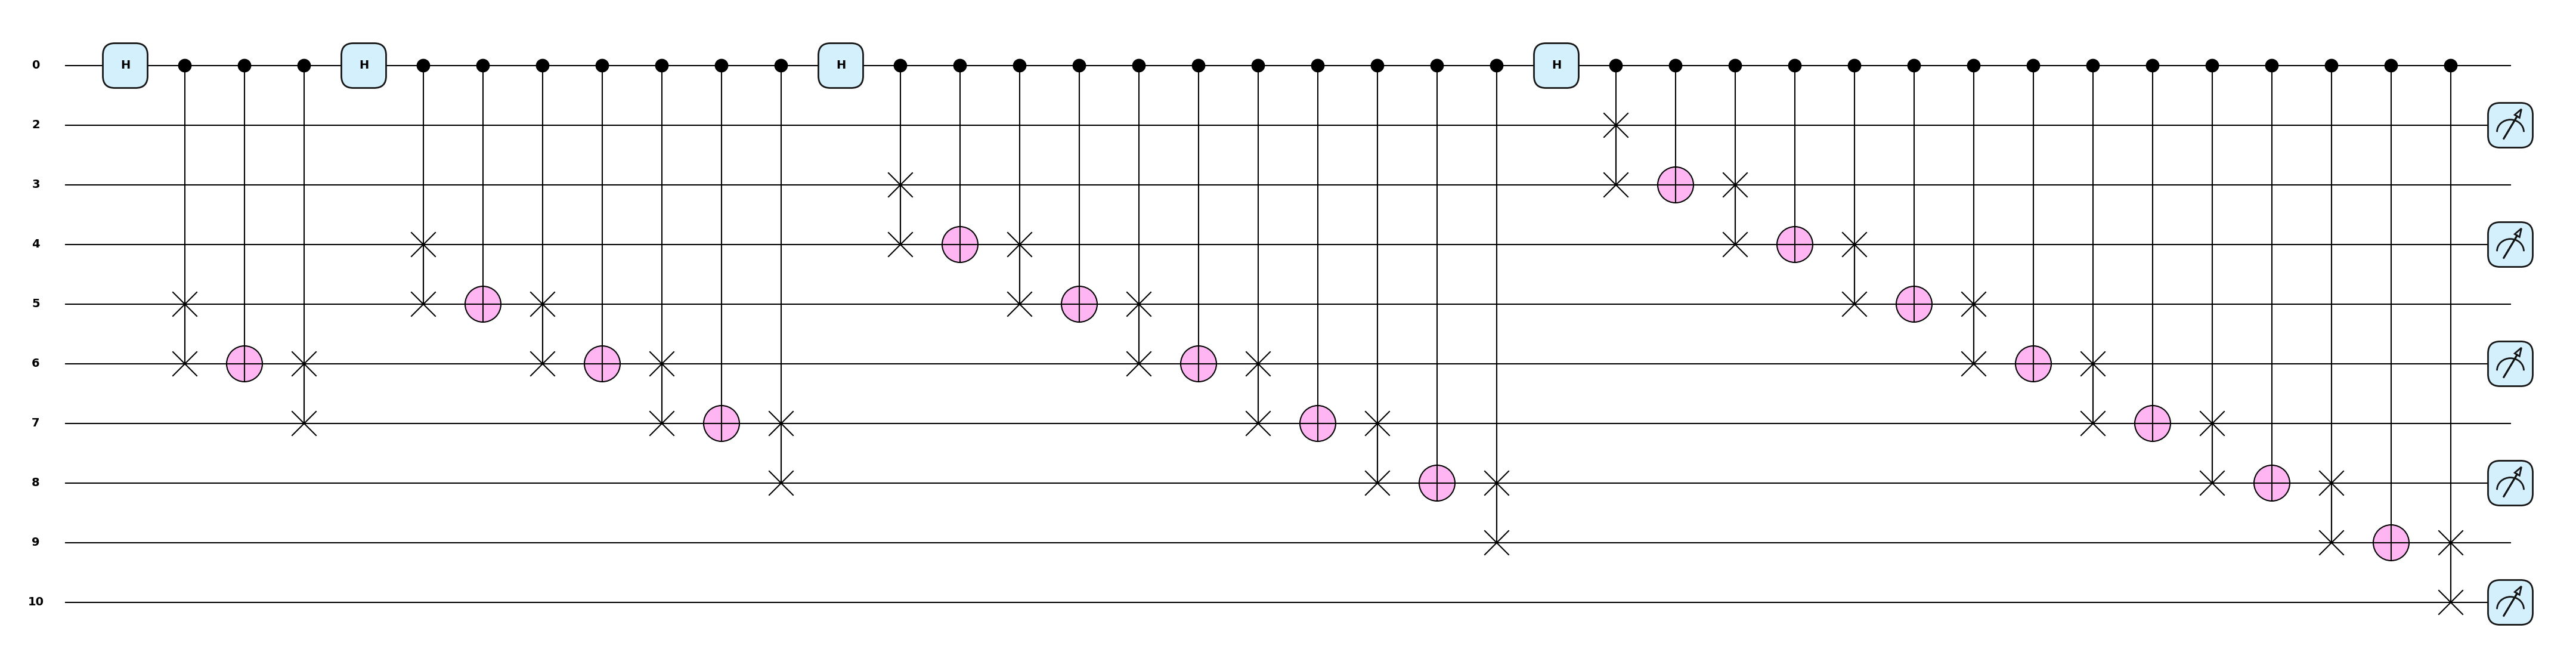

In [262]:
qml.draw_mpl(circuit2,style="pennylane")()

In [263]:
circuit2()

array([0.3125, 0.1875, 0.0625, 0.125 , 0.0625, 0.0625, 0.0625, 0.0625,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [264]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



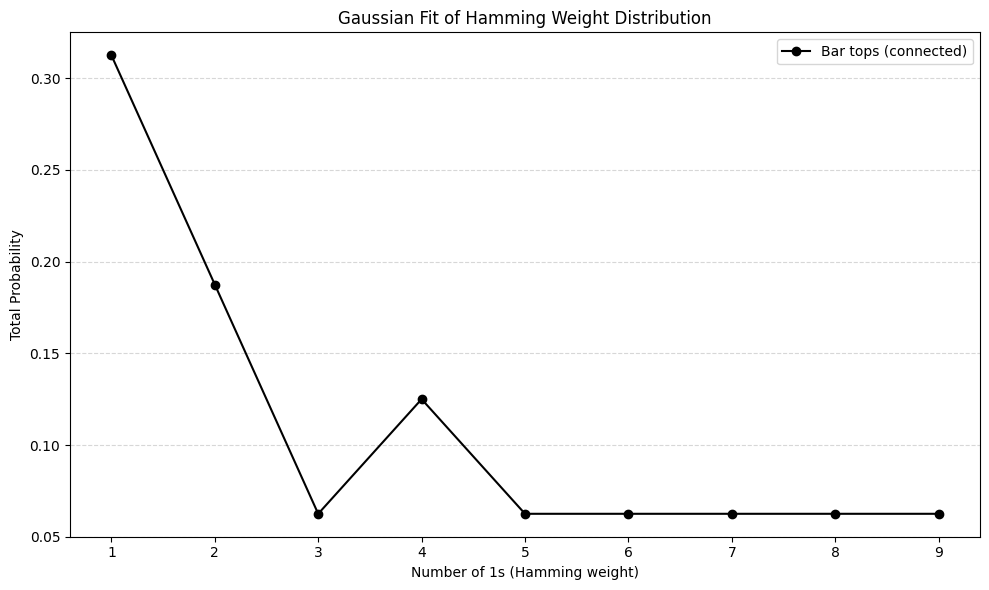

In [265]:
x = []
y = []
sum_count = 0

# Collect data from circuit2()
for i in circuit2():
    if i != 0:
        y.append(i)
        sum_count += 1
        x.append(sum_count)

# # Gaussian function
# def gaussian(x, mu, sigma, amplitude):
#     return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# # Initial guess for parameters
# initial_guess = [np.mean(x), np.std(x), max(y)]

# # Fit Gaussian with bounds and higher maxfev
# popt, _ = curve_fit(
#     gaussian,
#     x,
#     y,
#     p0=initial_guess,
#     bounds=([min(x), 0, 0], [max(x), np.inf, np.inf]),
#     maxfev=10000
# )
# mu_fit, sigma_fit, amp_fit = popt

# # Smooth fitted curve
# x_dense = np.linspace(min(x), max(x), 300)
# gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
# plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


---



#Qiskit


this step is only to show how the General Galton should be if there a reset gate in Pennylane how would the curcuit look like

In [250]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [246]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [248]:
m=n
qc = QuantumCircuit(2*m+2,m+1)

In [ ]:
mid=m+1
qc.x(mid)
for i in range(m):
  qc.reset(0)
  qc.h(0)
  for j in range(-i,i+1):
    qc.cswap(0,mid+j,mid+j-1)
    qc.cx(mid+j,0)
    if j==i:
        qc.cswap(0,mid+j,mid+j+1)
        # qc.barrier(0)

result=()
for i in range (1,2*m+2,2):
  result+=(i,)
m_result=()
for i in range(m+1):
  m_result+=(i,)

qc.measure(result,m_result)

In [ ]:
display(qc.draw("mpl"))#, revese_bits="True")

In [ ]:
simulator = AerSimulator()
# AerSimulator.from_backend(real_backend)

shots=1024   #to be almost therotical be to left 00
job=simulator.run(qc,shots=shots)
result = job.result()
counts = result.get_counts(qc)

print(counts)

In [ ]:
import numpy as np
import math

x3=[]
y3=[]
for i,j in counts.items():
  x3.append(math.log10(int(i)))
  y3.append(j)

from scipy.optimize import curve_fit
def gaussian3(x3, mu, sigma, amplitude):
    return amplitude * np.exp(-(x3 - mu) ** 2 / (2 * sigma ** 2))

# Initial guess: center ≈ mean of x, width ≈ std dev, amplitude ≈ max(y)
initial_guess = [np.mean(x3), np.std(x3), max(y3)]
popt, _ = curve_fit(gaussian3, x3, y3, p0=initial_guess)
mu_fit, sigma_fit, amp_fit = popt

# Smooth fitted curve
x3_dense = np.linspace(min(x3), max(x3), 300)
gaussian3_curve = gaussian3(x3_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x3, y3, 'o', color='black', label="Bar tops")
plt.plot(x3_dense, gaussian3_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()